In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forrest in Classification

In [3]:
df = pd.read_csv('../DATA/penguins_size.csv').dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,
                             max_features='auto',
                             random_state=101)

rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [9]:
y_pred = rfc.predict(X_test)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


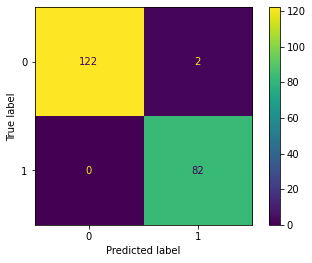

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

plot_confusion_matrix(rfc, X_test,y_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [13]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [14]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')
df

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


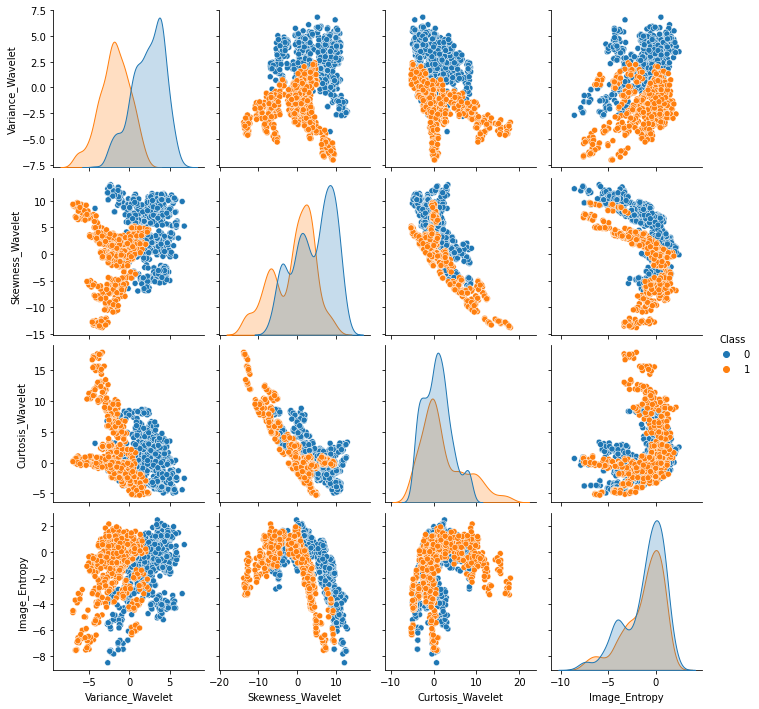

In [15]:
sns.pairplot(df, hue='Class')

In [16]:
X = df.drop(columns='Class')
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

from sklearn.model_selection import GridSearchCV

In [17]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'bootstrap' : bootstrap,
              'oob_score' : oob_score}

In [18]:
rfc = RandomForestClassifier()

In [19]:
grid = GridSearchCV(rfc,param_grid)
grid.fit(X_train,y_train)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedW

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [20]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [22]:
y_pred = grid.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [24]:
rfc = RandomForestClassifier(bootstrap=True, max_features=2, n_estimators=200,oob_score=True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [25]:
y_pred = rfc.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [29]:
errors = []
misclassification = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,y_pred)
    n_missed = np.sum(y_pred != y_test)
    errors.append(err)
    misclassification.append(n_missed)

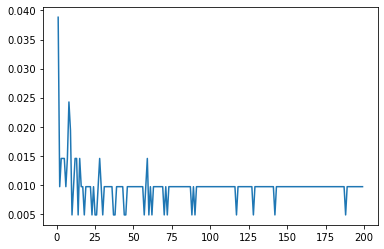

In [30]:
plt.plot(range(1,200), errors)

# Random Forrest in Regression

In [31]:
df = pd.read_csv('../DATA/rock_density_xray.csv')
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [32]:
df.columns = ['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

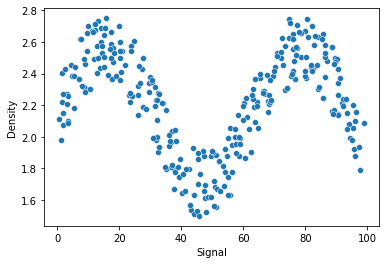

In [33]:
sns.scatterplot(x="Signal", y='Density', data=df)

In [37]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
mean_absolute_error(y_test,y_pred)

0.211198973318633

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2570051996584629

In [45]:
mean_squared_error(y_test,y_pred,squared=False)

0.2570051996584629

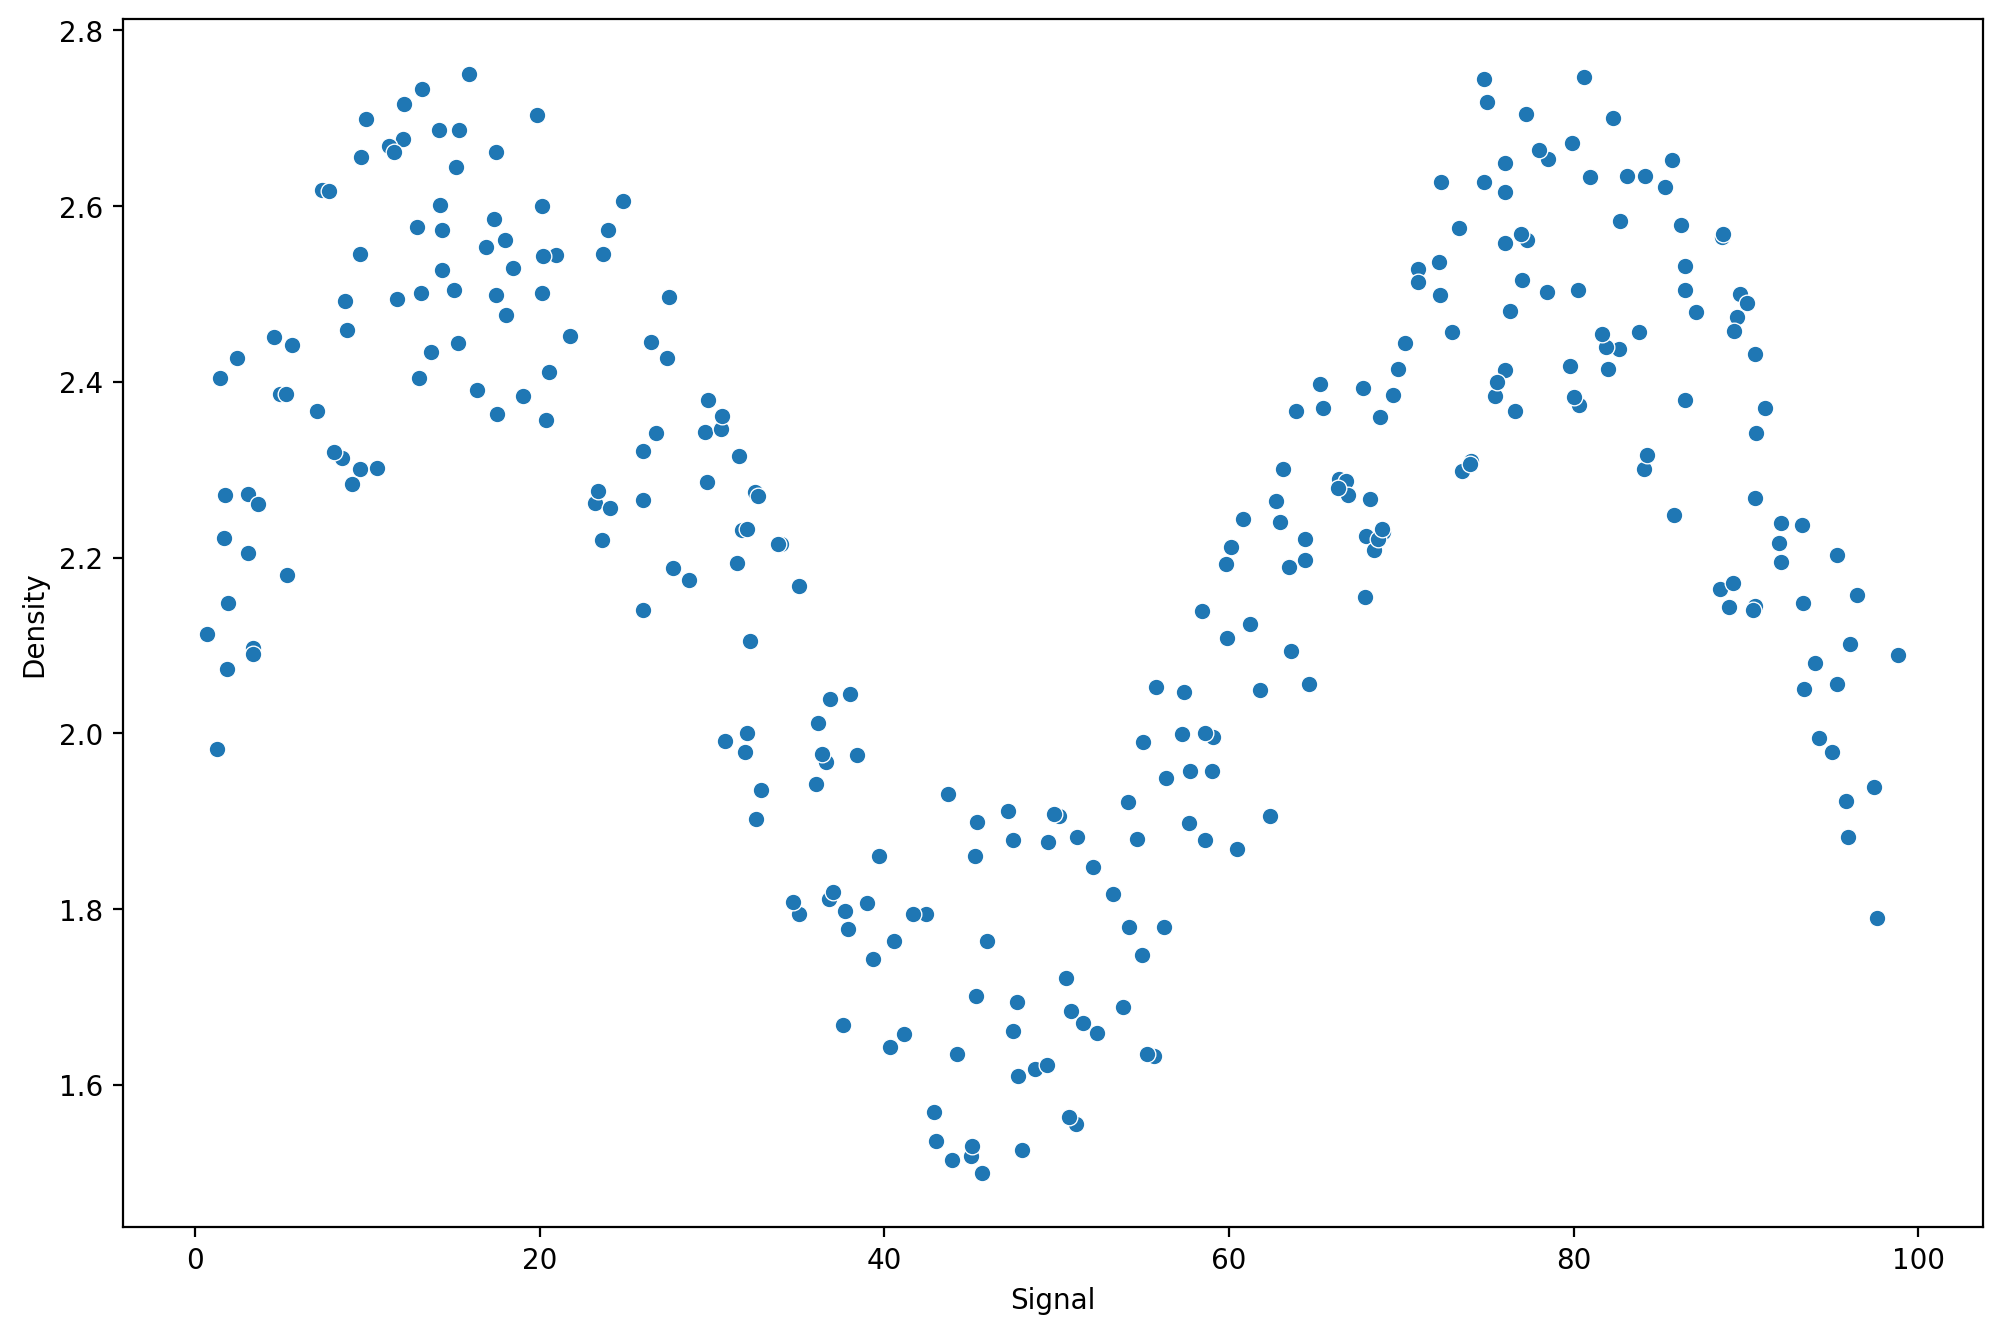

In [47]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x="Signal", y='Density', data=df)

In [60]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'MAE : {mean_absolute_error(y_test,preds)}')
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

MAE : 0.211198973318633
RMSE : 0.2570051996584629


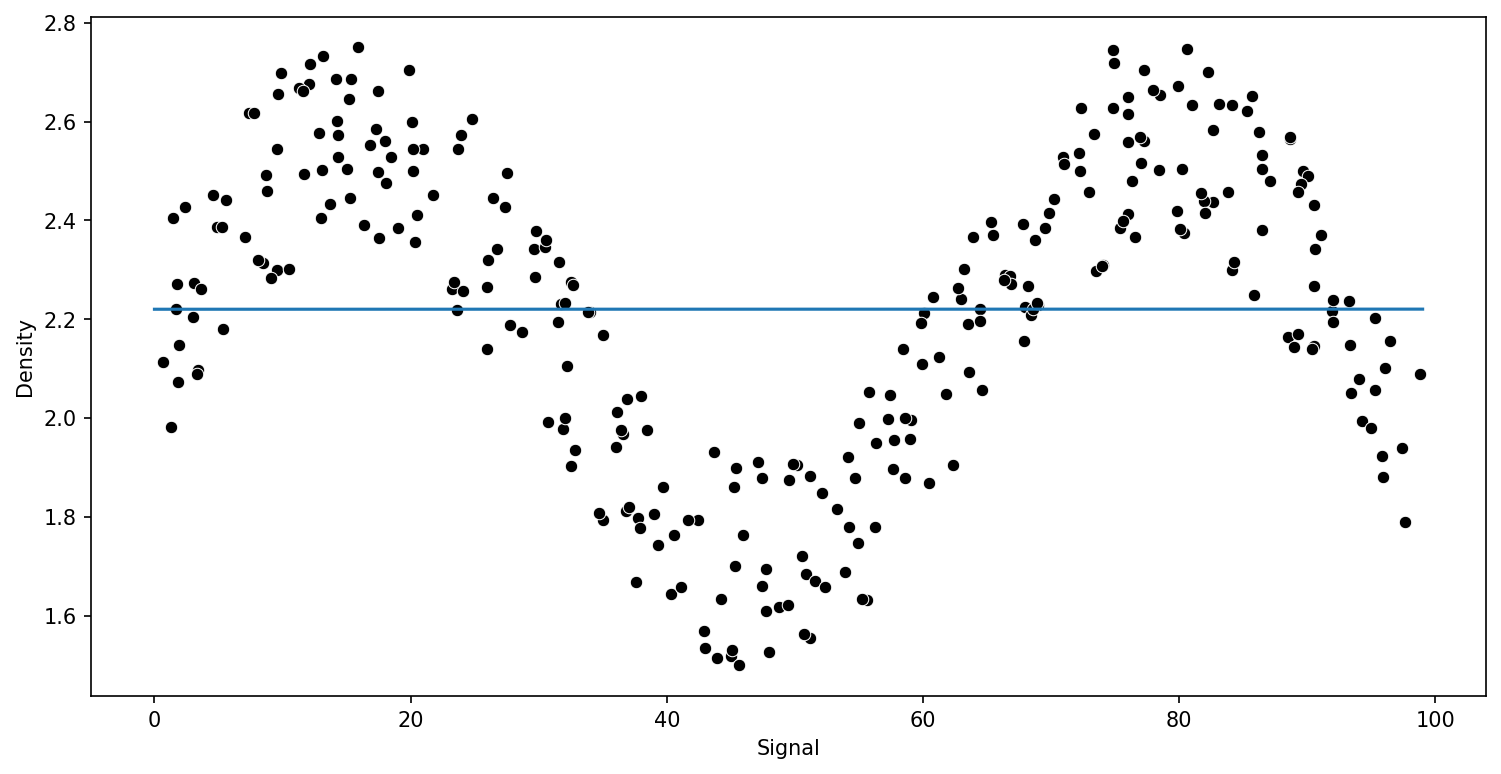

In [61]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

MAE : 0.11969085253552043
RMSE : 0.13807383449323551


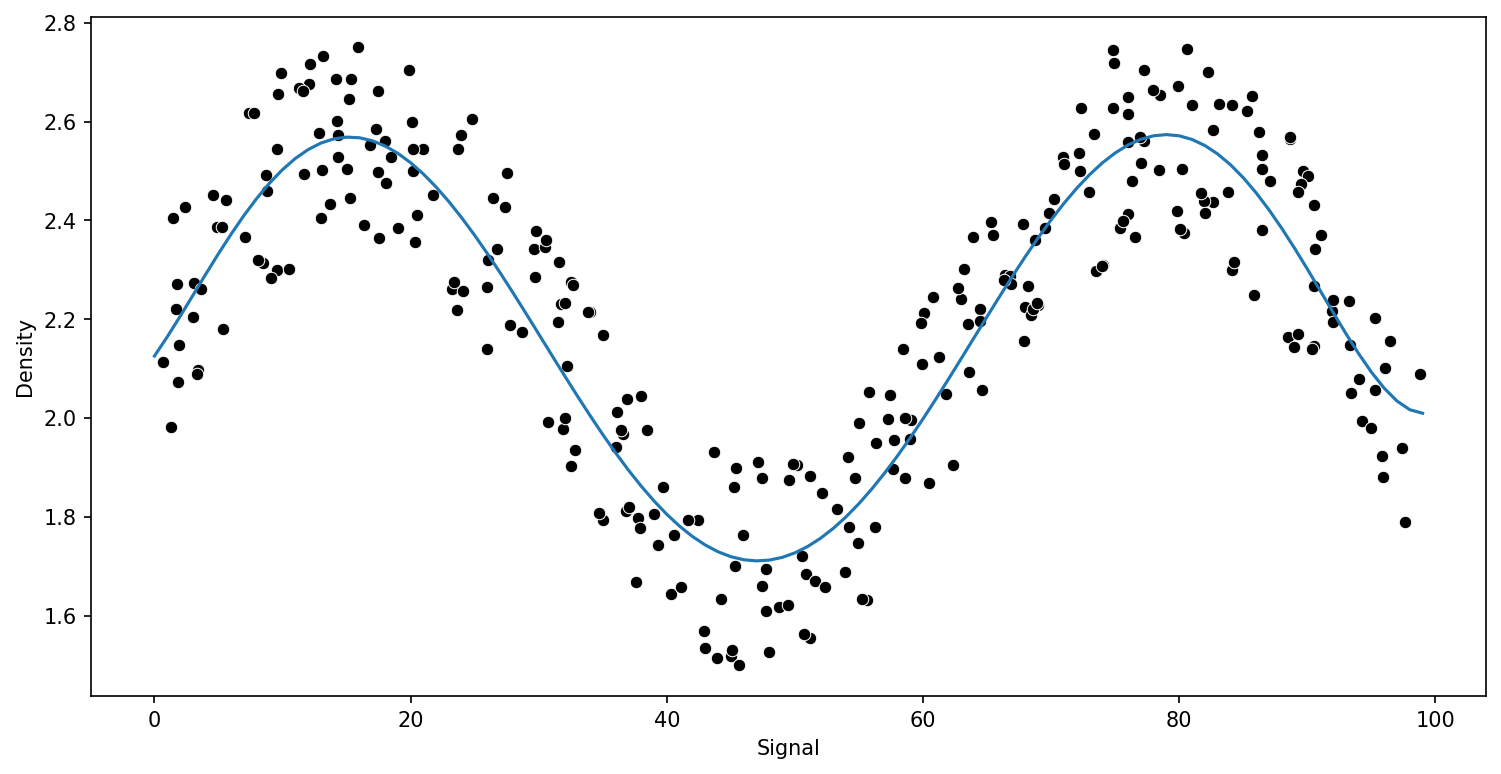

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

run_model(pipe,X_train,y_train,X_test,y_test)

MAE : 0.11877297474442378
RMSE : 0.1523487028635337
MAE : 0.12198383614100558
RMSE : 0.13730685016923647
MAE : 0.11635971693292672
RMSE : 0.13277855732740926


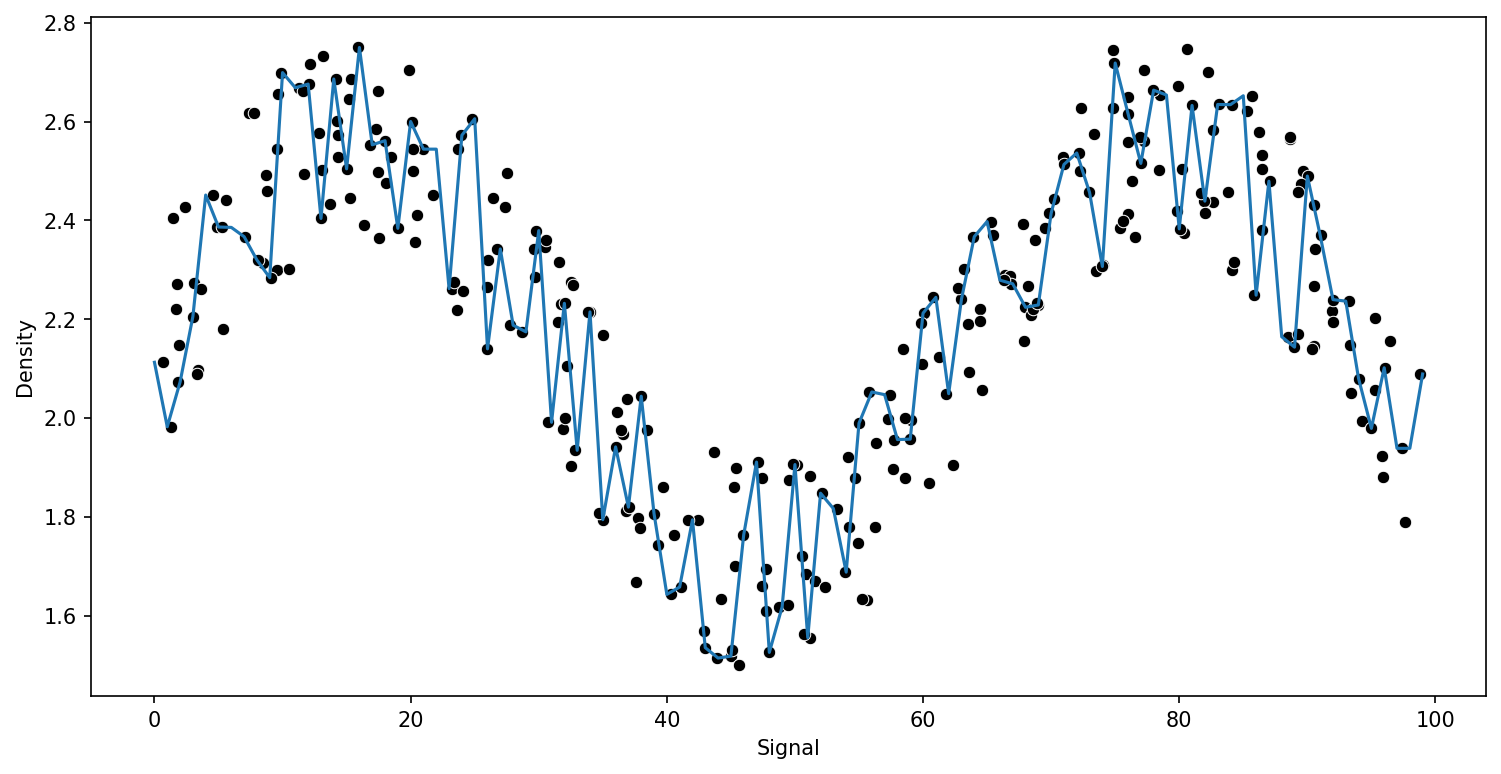

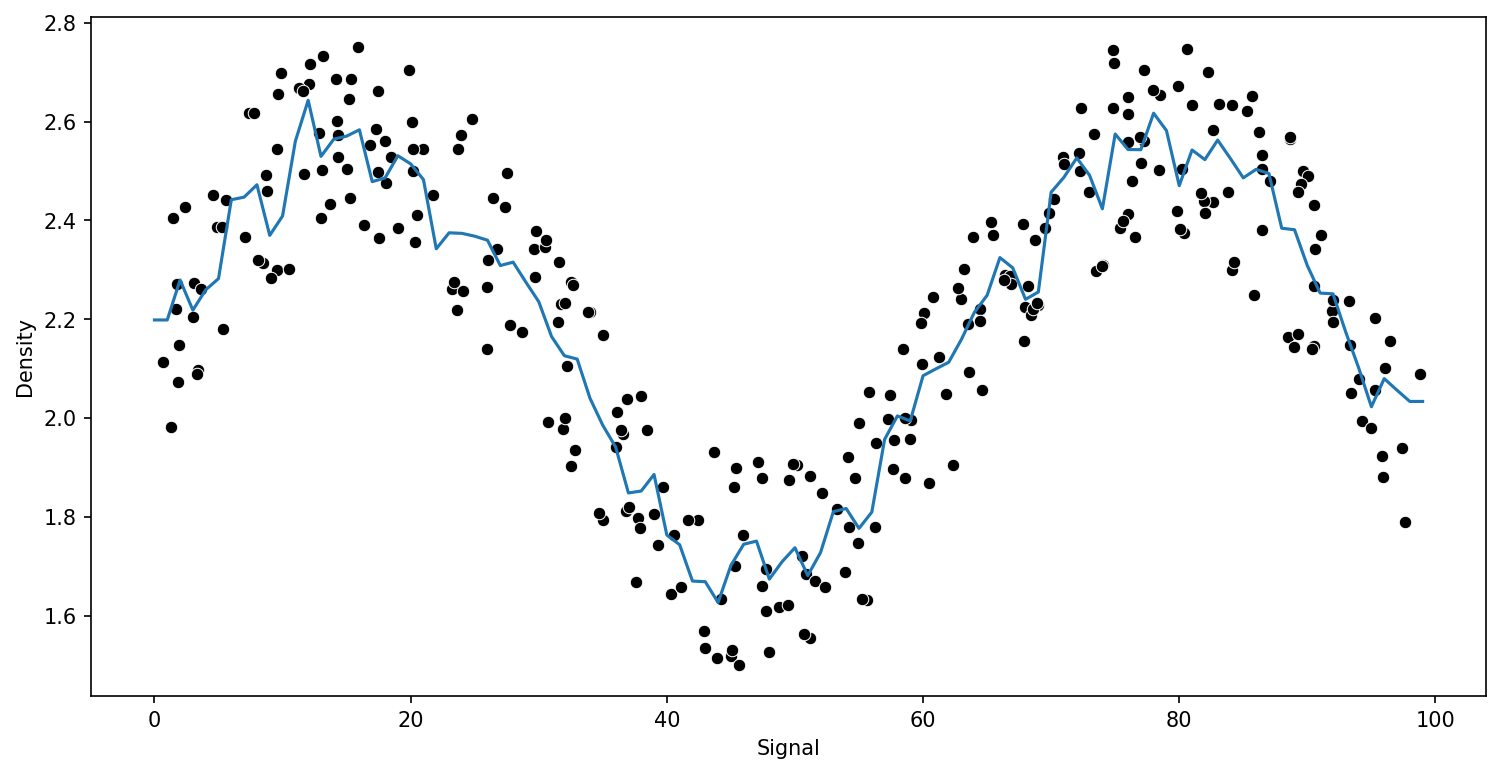

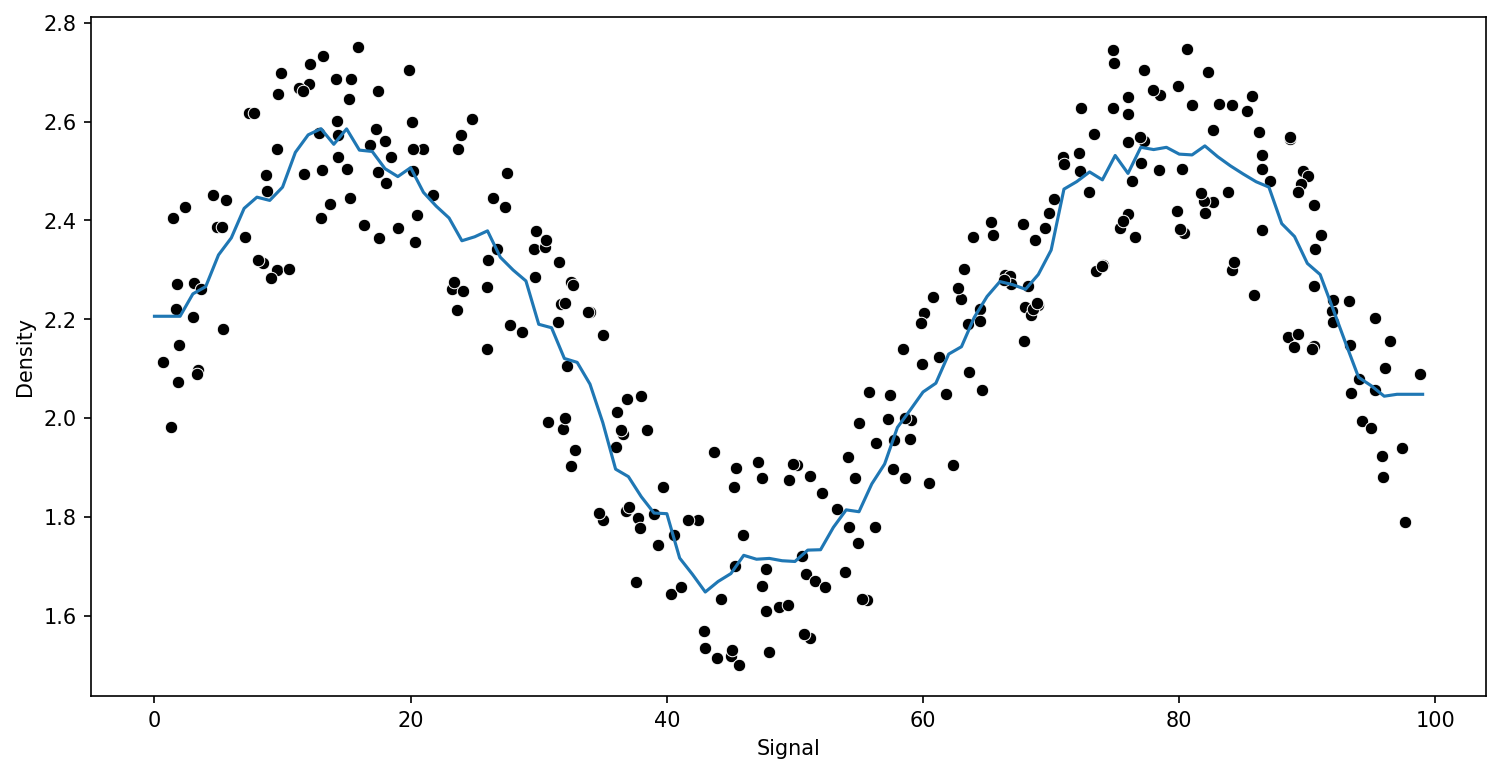

In [63]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

MAE : 0.11877297474442378
RMSE : 0.1523487028635337


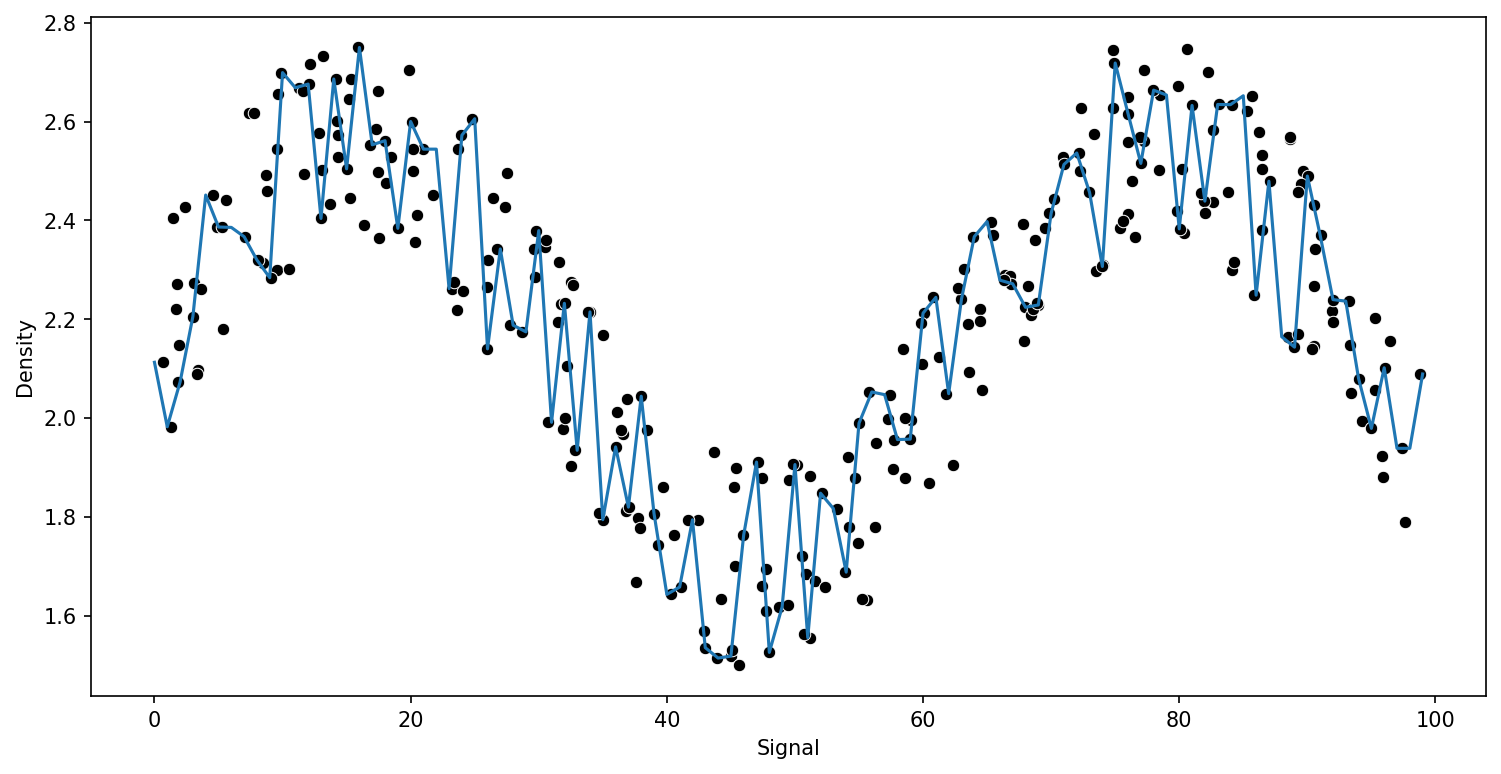

In [64]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE : 0.10854210121348368
RMSE : 0.12646999302046696


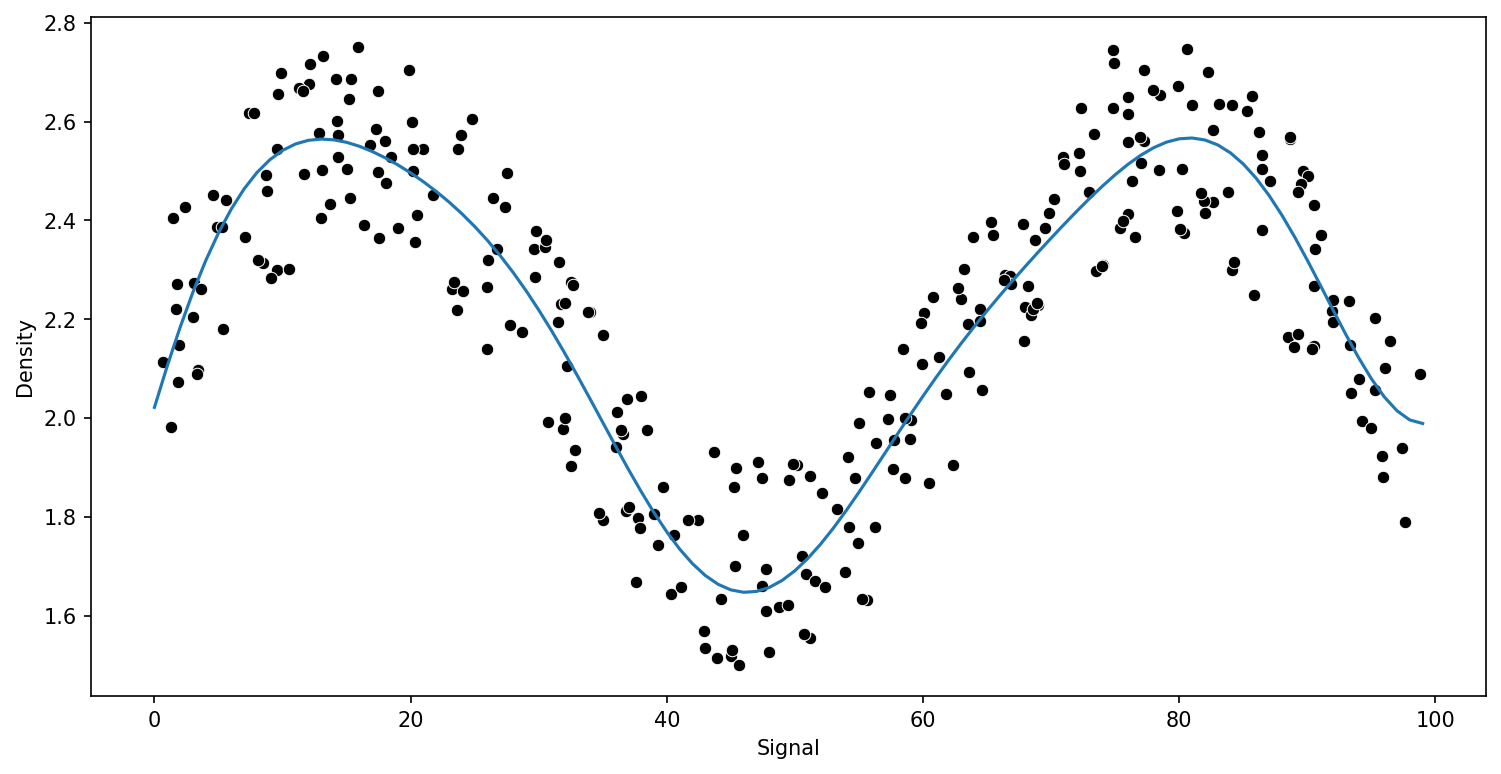

In [66]:
from sklearn.svm import SVR

svr = SVR()
param_grid = {
    'C' : [0.01,0.1,1,5,10,100,1000],
    'gamma' : ['auto', 'scale']
}

grid = GridSearchCV(svr,param_grid)

run_model(grid,X_train,y_train,X_test,y_test)

MAE : 0.11833484510325329
RMSE : 0.1403166887998929


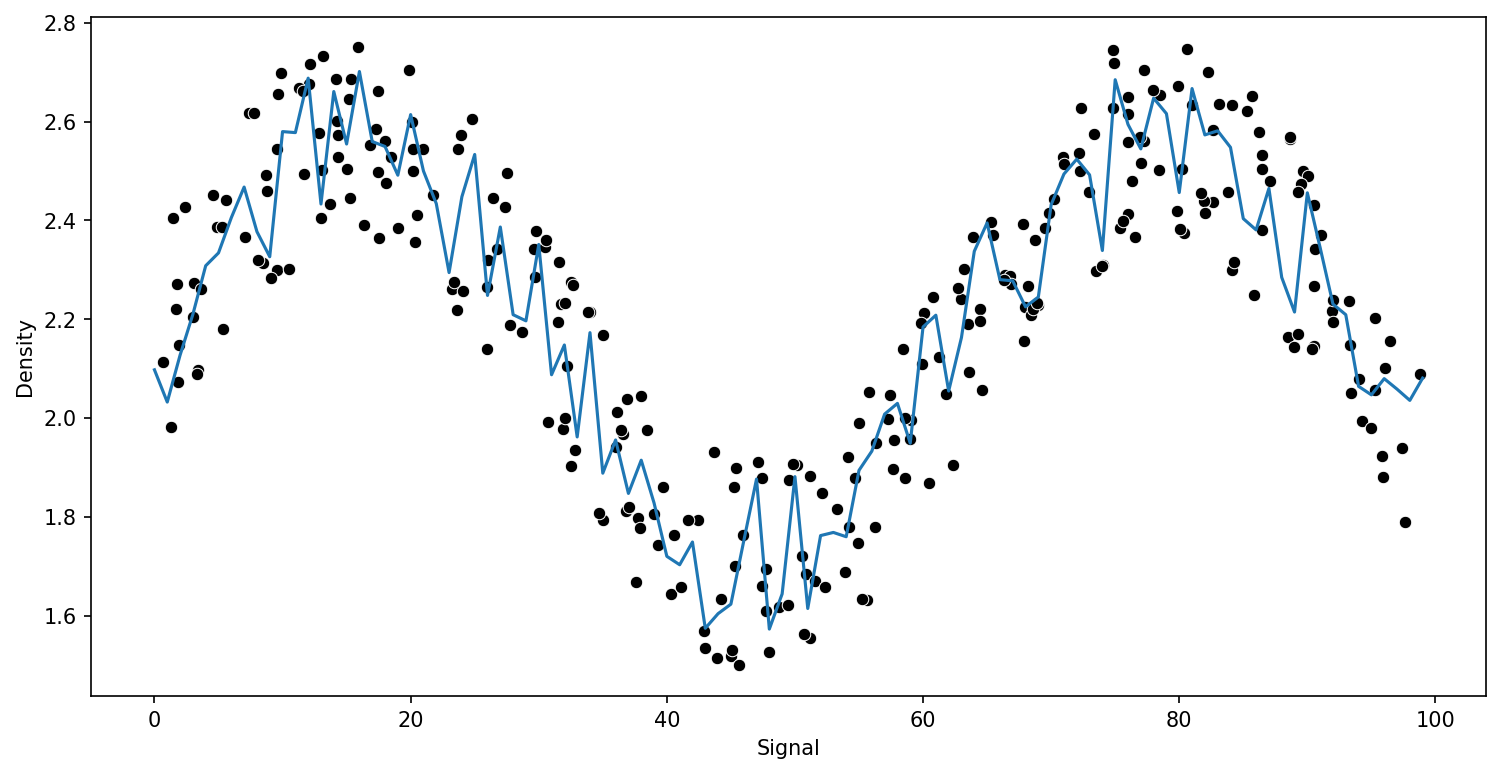

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr,X_train,y_train,X_test,y_test)

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


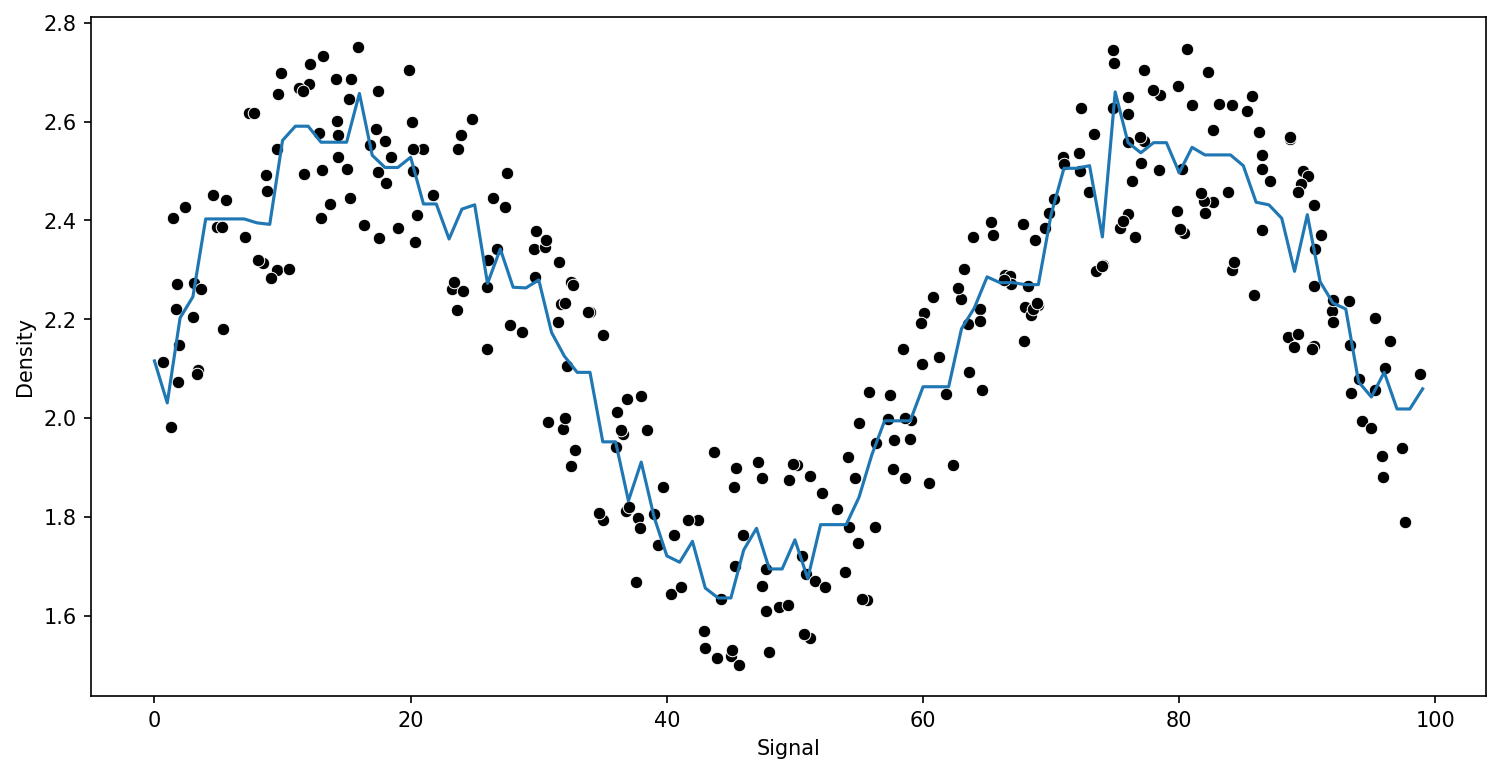

In [70]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE : 0.11685619021097512
RMSE : 0.13451229751975954


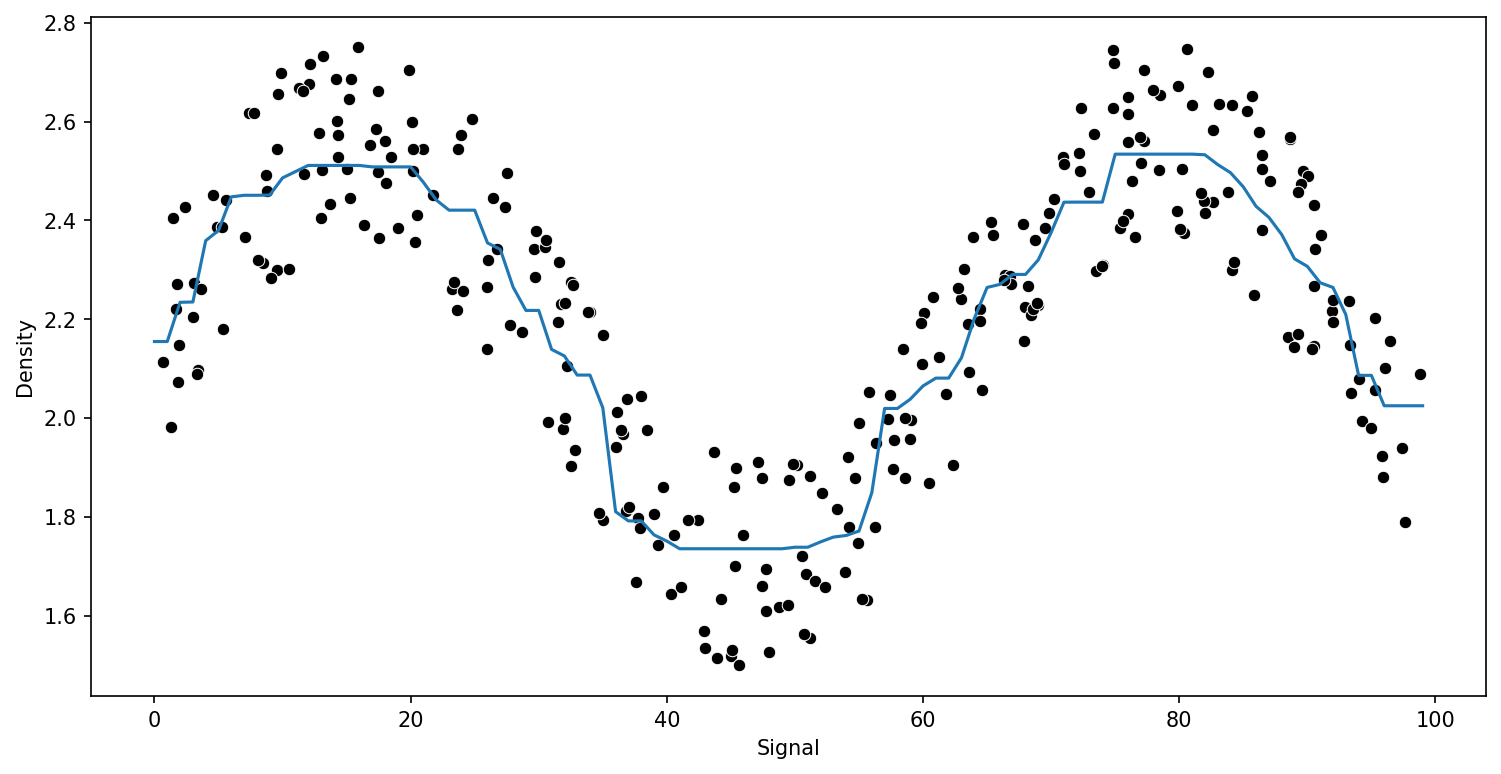

In [71]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)